# Credit Card Clients - Exploratory Data Analysis

Pada <i>Exploratory Data Analysis project</i> ini akan dilakukan analisis mengenai <i>Default of Credit Card Clients</i> yang diperoleh dari <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients">UCI</a>. Data penelitian ini meninjau literatur dan menggunakan 23 variabel berikut:

<ul style="text-align:justify">
    <li>This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.</li>
    <li>X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.</li>
    <li>X2: Gender (1 = male; 2 = female).</li>
    <li>X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).</li>
    <li>X4: Marital status (1 = married; 2 = single; 3 = others).</li>
    <li>X5: Age (year).</li>
    <li>X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.</li>
    <li>X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.</li>
    <li>X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005.</li>
<ul>

## Data Acquisition

#### Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Data

In [2]:
# add headers
headers = ['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1_sept', 'pay_2_aug', 'pay_3_july', 'pay_4_june',
           'pay_5_may', 'pay_6_april', 'bill_amt1_sept', 'bill_amt2_aug', 'bill_amt3_july', 'bill_amt4_june', 'bill_amt5_may',
           'bill_amt6_april', 'pay_amt1_sept', 'pay_amt2_aug', 'pay_amt3_july', 'pay_amt4_june', 'pay_amt5_may', 'pay_amt6_april',
           'default payment']
df = pd.read_excel('default_of_credit_card_clients.xls', names=headers)

In [3]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1_sept,pay_2_aug,pay_3_july,pay_4_june,...,bill_amt4_june,bill_amt5_may,bill_amt6_april,pay_amt1_sept,pay_amt2_aug,pay_amt3_july,pay_amt4_june,pay_amt5_may,pay_amt6_april,default payment
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
# drop one row
df.drop([0], axis=0, inplace=True)

# reset index, karena sebelumnya dilakukan drop pada salah satu baris
df.reset_index(drop=True, inplace=True)
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1_sept,pay_2_aug,pay_3_july,pay_4_june,...,bill_amt4_june,bill_amt5_may,bill_amt6_april,pay_amt1_sept,pay_amt2_aug,pay_amt3_july,pay_amt4_june,pay_amt5_may,pay_amt6_april,default payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# dilakukan penamaan sebagian kolom fitur sesuai keterangannya
df['sex'].replace(1, 'male', inplace=True)
df['sex'].replace(2, 'female', inplace=True)
df['education'].replace(1, 'graduate school', inplace=True)
df['education'].replace(2, 'university', inplace=True)
df['education'].replace(3, 'high school', inplace=True)
df['education'].replace(4, 'others', inplace=True)
df['marriage'].replace(1, 'married', inplace=True)
df['marriage'].replace(2, 'single', inplace=True)
df['marriage'].replace(3, 'others', inplace=True)
df['default payment'].replace(1, 'yes', inplace=True)
df['default payment'].replace(0, 'no', inplace=True)
df.head(10)

,id,limit_bal,sex,education,marriage,age,pay_1_sept,pay_2_aug,pay_3_july,pay_4_june,...,bill_amt4_june,bill_amt5_may,bill_amt6_april,pay_amt1_sept,pay_amt2_aug,pay_amt3_july,pay_amt4_june,pay_amt5_may,pay_amt6_april,default payment
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no
5,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,no
6,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,no
7,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,no
8,9,140000,female,high school,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,no
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,no


## Basic Insight of Dataset
#### Data Shape

In [6]:
df.shape

(30000, 25)

#### Data Type

In [7]:
df.dtypes

id                 object
limit_bal          object
sex                object
education          object
marriage           object
age                object
pay_1_sept         object
pay_2_aug          object
pay_3_july         object
pay_4_june         object
pay_5_may          object
pay_6_april        object
bill_amt1_sept     object
bill_amt2_aug      object
bill_amt3_july     object
bill_amt4_june     object
bill_amt5_may      object
bill_amt6_april    object
pay_amt1_sept      object
pay_amt2_aug       object
pay_amt3_july      object
pay_amt4_june      object
pay_amt5_may       object
pay_amt6_april     object
default payment    object
dtype: object

In [8]:
df['default payment'].value_counts()

no     23364
yes     6636
Name: default payment, dtype: int64

In [9]:
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_1_sept,pay_2_aug,pay_3_july,pay_4_june,...,bill_amt4_june,bill_amt5_may,bill_amt6_april,pay_amt1_sept,pay_amt2_aug,pay_amt3_july,pay_amt4_june,pay_amt5_may,pay_amt6_april,default payment
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,30000,50000,female,university,single,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [10]:
# 5 teratas dari jenis status pembayaran dari riwayat pembayaran sebelumnya
df['pay_1_sept'].value_counts().head()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
Name: pay_1_sept, dtype: int64

In [11]:
# 5 teratas dari jumlah laporan tagihan
df['bill_amt1_sept'].value_counts().head()

0      2008
390     244
780      76
326      72
316      63
Name: bill_amt1_sept, dtype: int64

In [12]:
# 5 teratas dari jumlah pembayaran sebelumnya
df['pay_amt1_sept'].value_counts().head()

0       5249
2000    1363
3000     891
5000     698
1500     507
Name: pay_amt1_sept, dtype: int64

In [13]:
# banyaknya batas saldo unik yang tersedia
df['limit_bal'].nunique()

81

## Data Wrangling
#### Identify and handle missing values

In [14]:
for i in df.columns:
    a=df[df[i]=='?'].shape[0]
    if a>0:
        print(i, '\t: ', a)
    else:
        print(i, '\t: No missing values')

id 	: No missing values
limit_bal 	: No missing values
sex 	: No missing values
education 	: No missing values
marriage 	: No missing values
age 	: No missing values
pay_1_sept 	: No missing values
pay_2_aug 	: No missing values
pay_3_july 	: No missing values
pay_4_june 	: No missing values
pay_5_may 	: No missing values
pay_6_april 	: No missing values
bill_amt1_sept 	: No missing values
bill_amt2_aug 	: No missing values
bill_amt3_july 	: No missing values
bill_amt4_june 	: No missing values
bill_amt5_may 	: No missing values
bill_amt6_april 	: No missing values
pay_amt1_sept 	: No missing values
pay_amt2_aug 	: No missing values
pay_amt3_july 	: No missing values
pay_amt4_june 	: No missing values
pay_amt5_may 	: No missing values
pay_amt6_april 	: No missing values
default payment 	: No missing values


In [15]:
df.isnull().sum()

id                 0
limit_bal          0
sex                0
education          0
marriage           0
age                0
pay_1_sept         0
pay_2_aug          0
pay_3_july         0
pay_4_june         0
pay_5_may          0
pay_6_april        0
bill_amt1_sept     0
bill_amt2_aug      0
bill_amt3_july     0
bill_amt4_june     0
bill_amt5_may      0
bill_amt6_april    0
pay_amt1_sept      0
pay_amt2_aug       0
pay_amt3_july      0
pay_amt4_june      0
pay_amt5_may       0
pay_amt6_april     0
default payment    0
dtype: int64

#### Convert data types to proper format

In [16]:
df[['id','limit_bal','age','pay_1_sept','pay_2_aug','pay_3_july','pay_4_june','pay_5_may','pay_6_april',
   'bill_amt1_sept','bill_amt2_aug','bill_amt3_july','bill_amt4_june','bill_amt5_may','bill_amt6_april',
   'pay_amt1_sept','pay_amt2_aug','pay_amt3_july','pay_amt4_june','pay_amt5_may','pay_amt6_april']] = df[['id',
                                                                                                          'limit_bal','age','pay_1_sept','pay_2_aug','pay_3_july','pay_4_june','pay_5_may','pay_6_april',
                                                                                                          'bill_amt1_sept','bill_amt2_aug','bill_amt3_july','bill_amt4_june','bill_amt5_may','bill_amt6_april',
                                                                                                          'pay_amt1_sept','pay_amt2_aug','pay_amt3_july','pay_amt4_june','pay_amt5_may','pay_amt6_april']].astype('int')
df.dtypes

id                  int64
limit_bal           int64
sex                object
education          object
marriage           object
age                 int64
pay_1_sept          int64
pay_2_aug           int64
pay_3_july          int64
pay_4_june          int64
pay_5_may           int64
pay_6_april         int64
bill_amt1_sept      int64
bill_amt2_aug       int64
bill_amt3_july      int64
bill_amt4_june      int64
bill_amt5_may       int64
bill_amt6_april     int64
pay_amt1_sept       int64
pay_amt2_aug        int64
pay_amt3_july       int64
pay_amt4_june       int64
pay_amt5_may        int64
pay_amt6_april      int64
default payment    object
dtype: object

In [17]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1_sept,pay_2_aug,pay_3_july,pay_4_june,...,bill_amt4_june,bill_amt5_may,bill_amt6_april,pay_amt1_sept,pay_amt2_aug,pay_amt3_july,pay_amt4_june,pay_amt5_may,pay_amt6_april,default payment
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


## Data Visualization

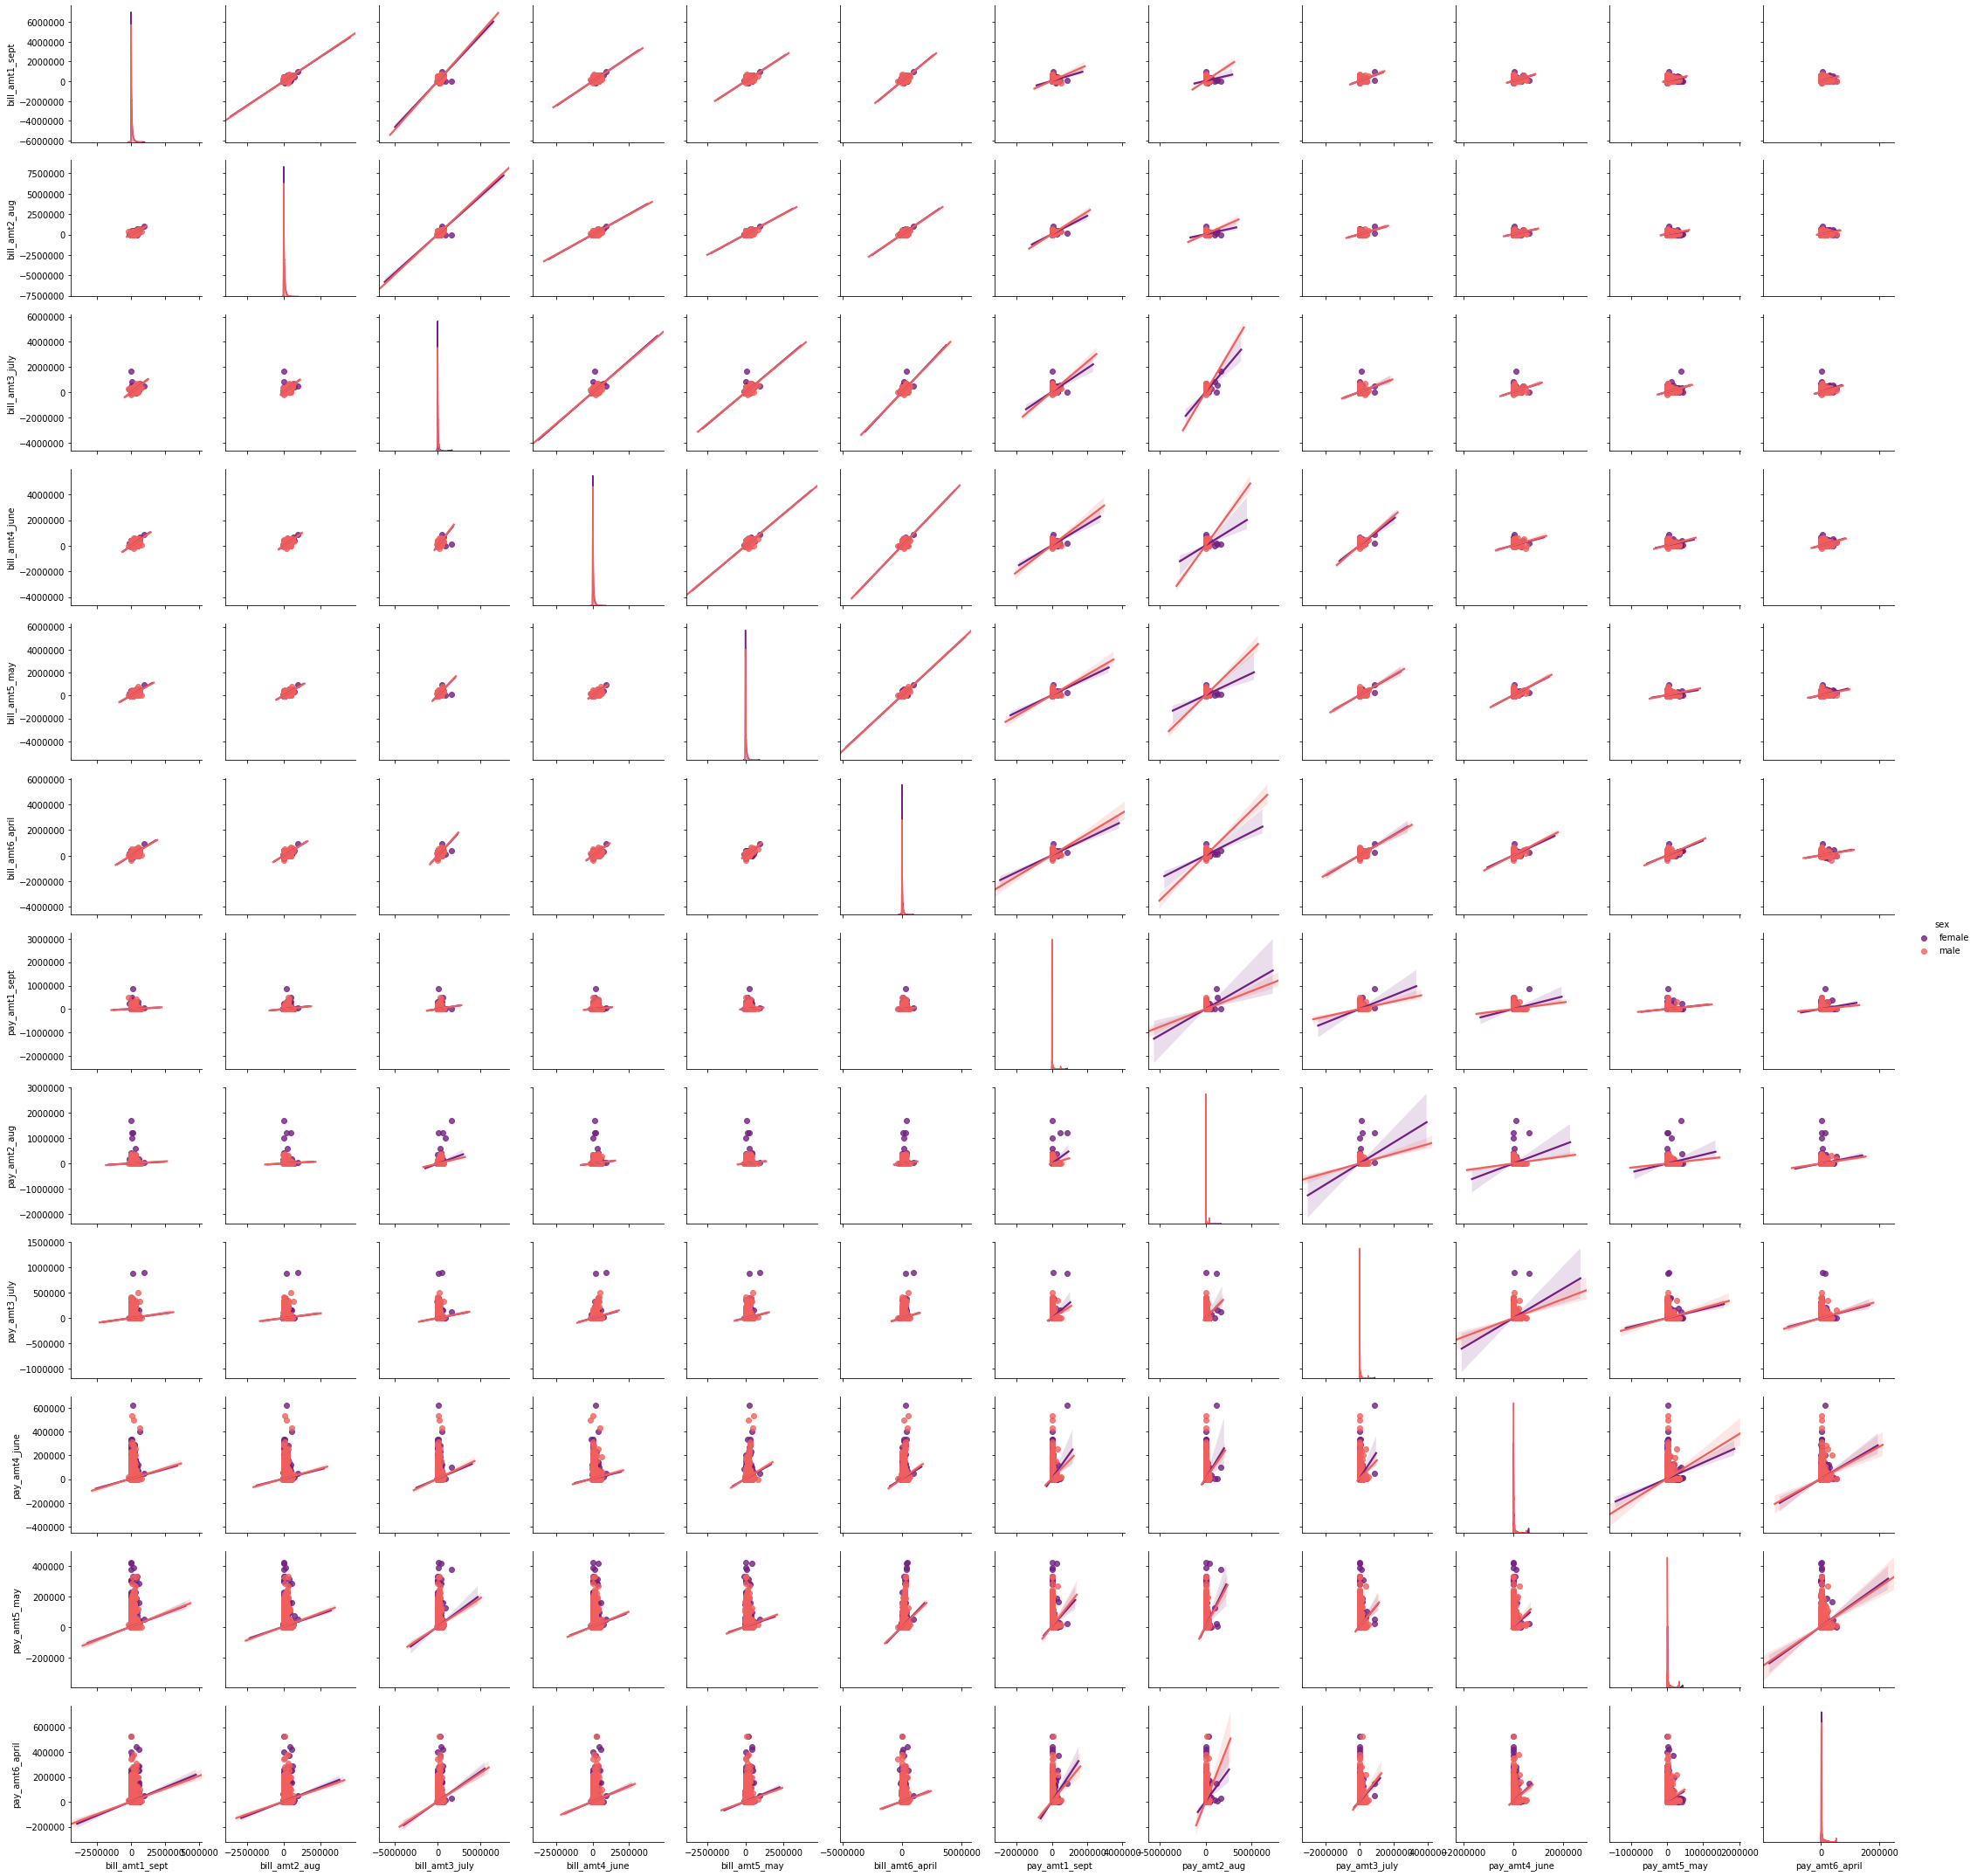

In [19]:
df_regplot = df[['sex','bill_amt1_sept','bill_amt2_aug','bill_amt3_july','bill_amt4_june','bill_amt5_may','bill_amt6_april',
                'pay_amt1_sept','pay_amt2_aug','pay_amt3_july','pay_amt4_june','pay_amt5_may','pay_amt6_april']]
sns.pairplot(df_regplot, hue='sex', kind='reg', palette='magma')

<div style="text-align: justify"> Dari grafik di atas terlihat bahwa ketika jumlah pembayaran sebelumnya meningkat maka jumlah laporan tagihan juga meningkat (hubungan antara <i>Amount of bill statement</i> vs <i>Amount of previous payment</i>). Hal ini menunjukkan korelasi positif antara kedua variabel tersebut. Jumlah pembayaran sebelumnya terlihat seperti prediktor yang cukup bagus untuk jumlah laporan tagihan karena garis regresi menunjukkan peningkatan yang cukup signifikan. Grafik di atas juga menunjukkan peningkatan yang dinyatakan berdasarkan jenis kelamin yang antara pria maupun wanita. Namun dilihat dari jumlah pembayaran terlihat bahwa seiring berjalannya waktu penggunaan kartu kredit masing-masing orang terus berkurang.
</div>

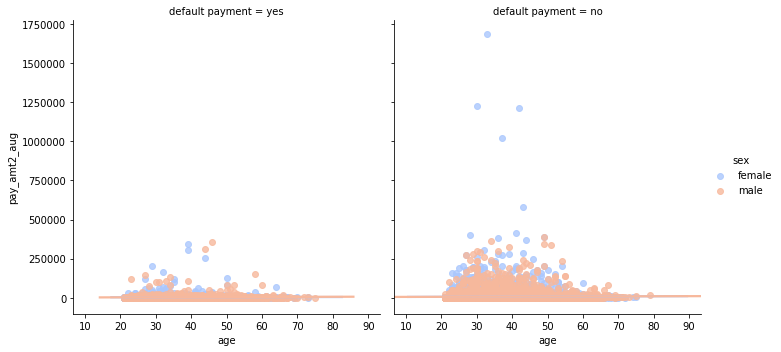

In [20]:
sns.lmplot(x='age',y='pay_amt2_aug',data=df, col='default payment',hue='sex',palette='coolwarm')

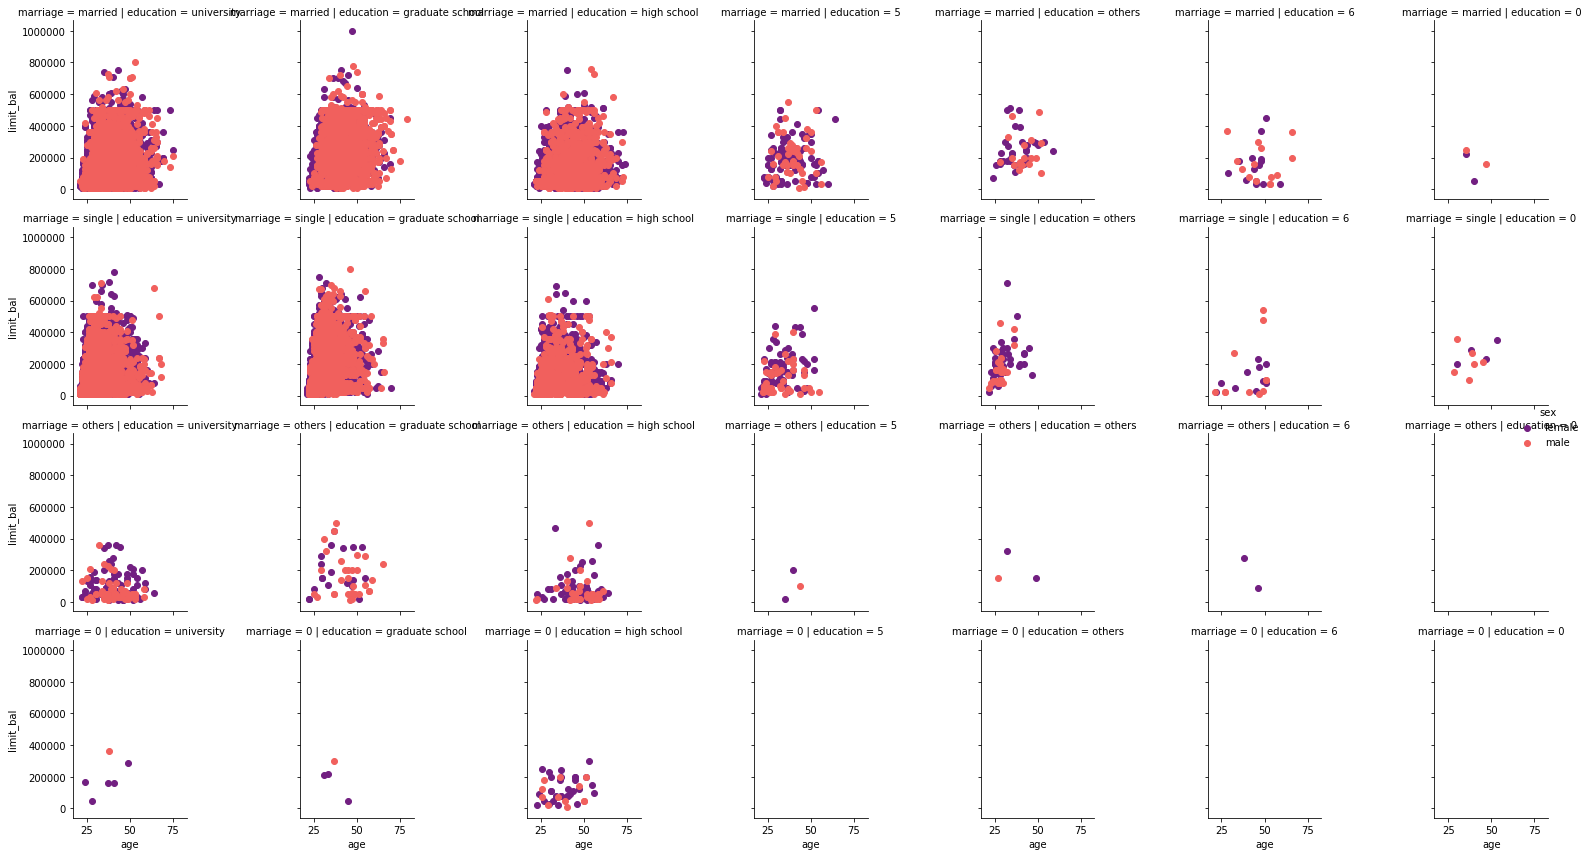

In [21]:
g = sns.FacetGrid(df, col='education', row='marriage', hue='sex', palette='magma')
g = g.map(plt.scatter, 'age', "limit_bal").add_legend()
plt.tight_layout()

Grafik di atas menunjukkan distribusi dari pria dan wanita yang menerima kredit berdasarkan umur, batas saldo, status pernikahan, dan jenjang pendidikan.

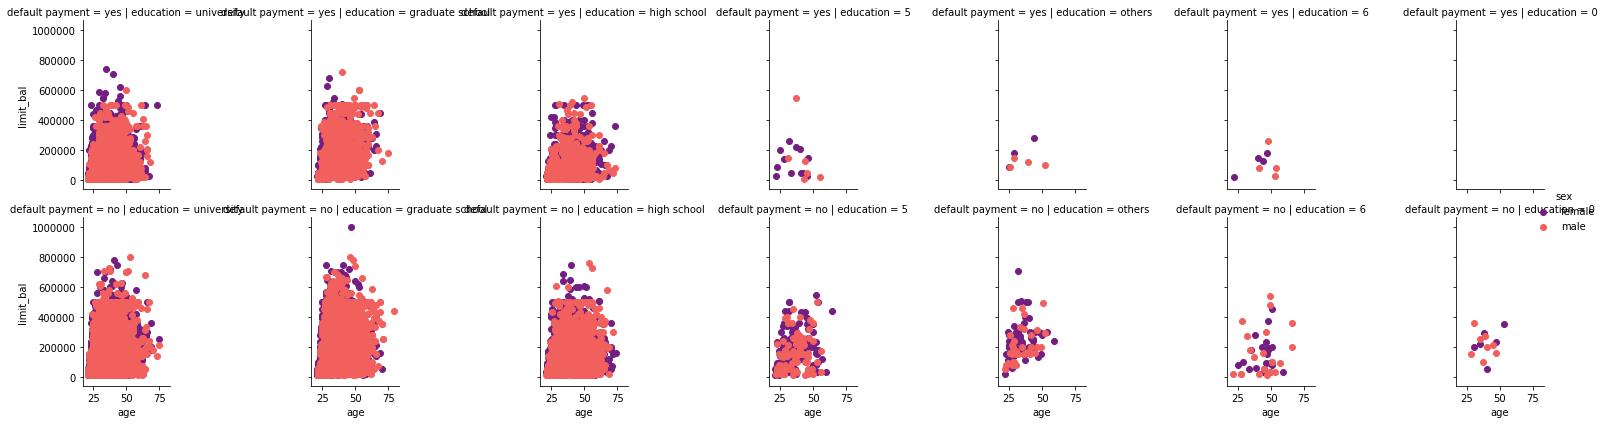

In [22]:
g = sns.FacetGrid(df, col='education', row='default payment', hue='sex', palette='magma')
g = g.map(plt.scatter, 'age', "limit_bal").add_legend()
plt.tight_layout()

Grafik di atas menunjukkan distribusi dari pria dan wanita yang menerima kredit berdasarkan umur, batas saldo, jenjang pendidikan, dan ada/tidak pembayaran pada bulan selanjutnya.

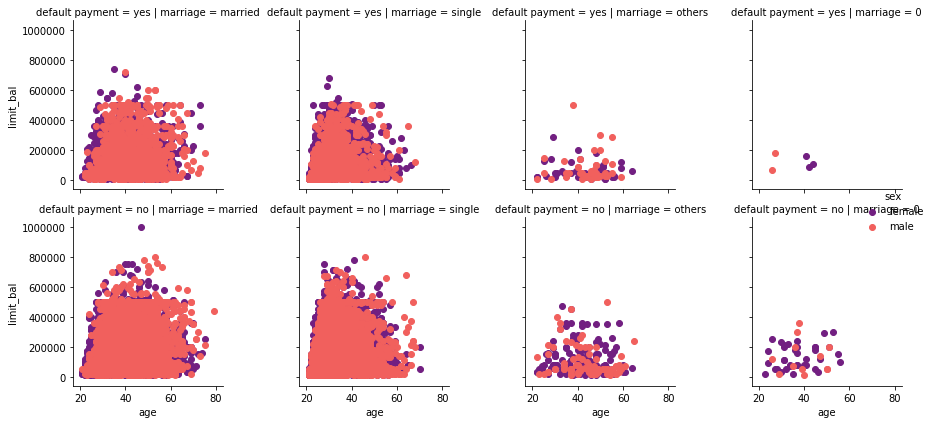

In [23]:
g = sns.FacetGrid(df, col='marriage', row='default payment', hue='sex', palette='magma')
g = g.map(plt.scatter, 'age', "limit_bal").add_legend()
plt.tight_layout()

Grafik di atas menunjukkan distribusi dari pria dan wanita yang menerima kredit berdasarkan umur, batas saldo, status pernikahan, dan ada/tidak pembayaran pada bulan selanjutnya yang berarti bahwa pemberian saldo kredit lebih diberikan pada seseorang yang status penikahannya <i>marriage</i> dan <i>single</i> (jelas status pernikahannya).

___

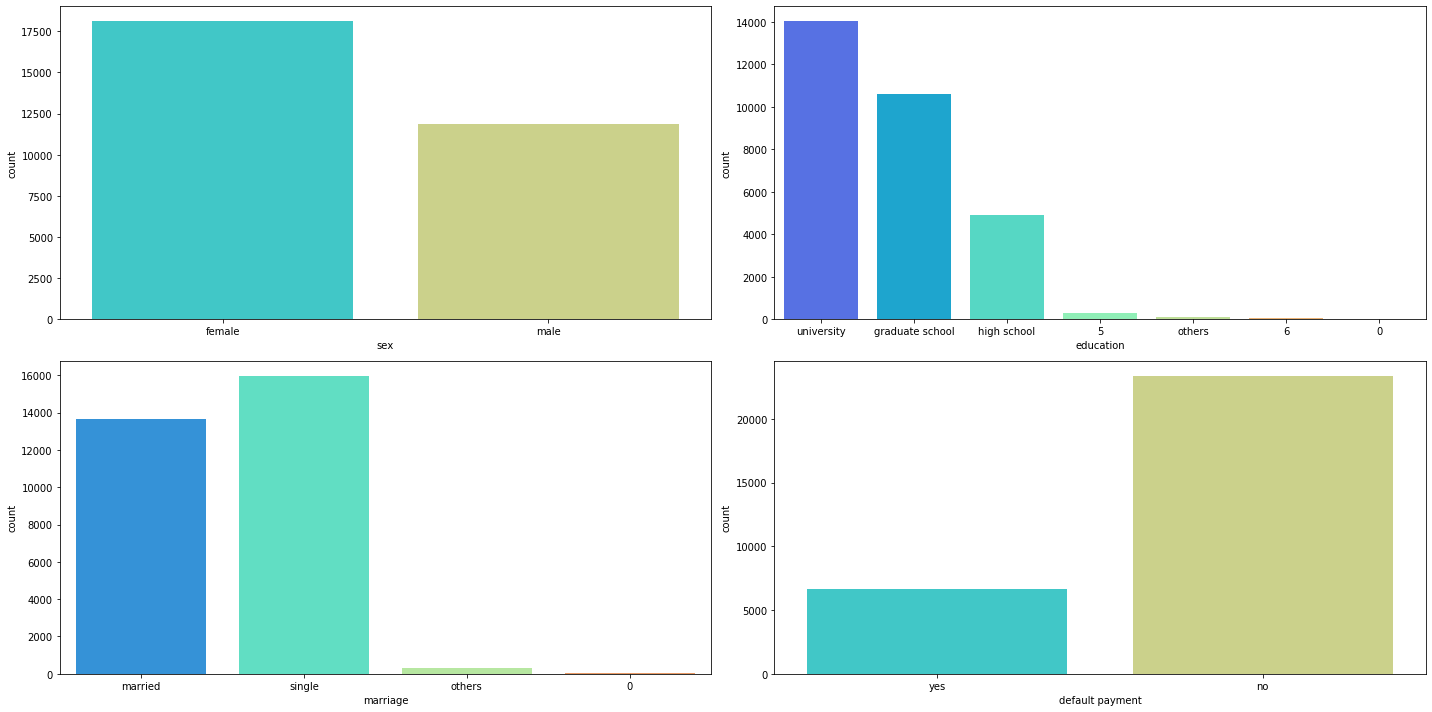

In [24]:
f, axes = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='sex', data=df, ax=axes[0,0], palette='rainbow')
sns.countplot(x='education', data=df, ax=axes[0,1], palette='rainbow')
sns.countplot(x='marriage', data=df, ax=axes[1,0], palette='rainbow')
sns.countplot(x='default payment', data=df, ax=axes[1,1], palette='rainbow')
plt.tight_layout()

Grafik di atas menunjukkan distribusi dari beberapa fitur kategori

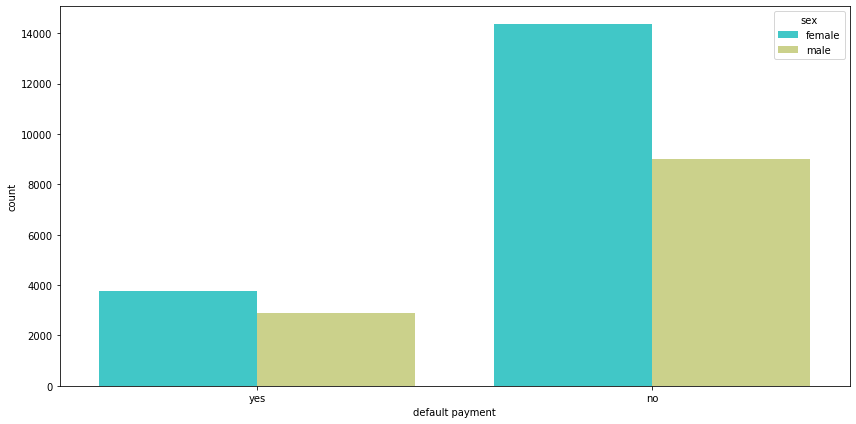

In [25]:
plt.figure(figsize=[12,6])
sns.countplot(x='default payment', data=df, hue='sex', palette='rainbow')
plt.tight_layout()

Dari grafik di atas ditunjukkan bahwa distribusi pria dan wanita mengenai ada/tidaknya pembayaran pada bulan selanjutnya. Terlihat bahwa distribusi <i>no</i> dengan jenis kelamin wanita memiliki nilai terbesar.

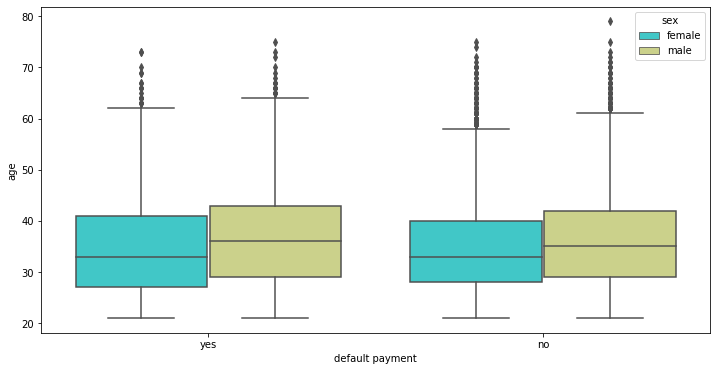

In [26]:
plt.figure(figsize=[12,6])
sns.boxplot(x='default payment', y='age', data=df, hue='sex', palette='rainbow')

___

In [27]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1_sept,pay_2_aug,pay_3_july,pay_4_june,...,bill_amt4_june,bill_amt5_may,bill_amt6_april,pay_amt1_sept,pay_amt2_aug,pay_amt3_july,pay_amt4_june,pay_amt5_may,pay_amt6_april,default payment
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


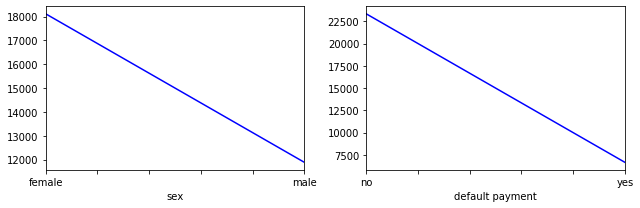

In [28]:
f, axes = plt.subplots(1,2,figsize=[9,3])

df.groupby('sex').count()['limit_bal'].plot(ax=axes[0], color='blue')
df.groupby('default payment').count()['limit_bal'].plot(ax=axes[1], color='blue')

plt.tight_layout()

<div style="text-align: justify">
Grafik sebelah kiri di atas menunjukkan bahwa batas saldo kredit terbesar diberikan pada orang-orang berjenis kelamin wanita. Kemudian grafik sebelah kanan di atas menunjukkan kemungkinan tidak ada pembayaran pada bulan selanjutnya yang dilakukan oleh orang-orang yang diberikan batas saldo kredit tinggi.
</div>

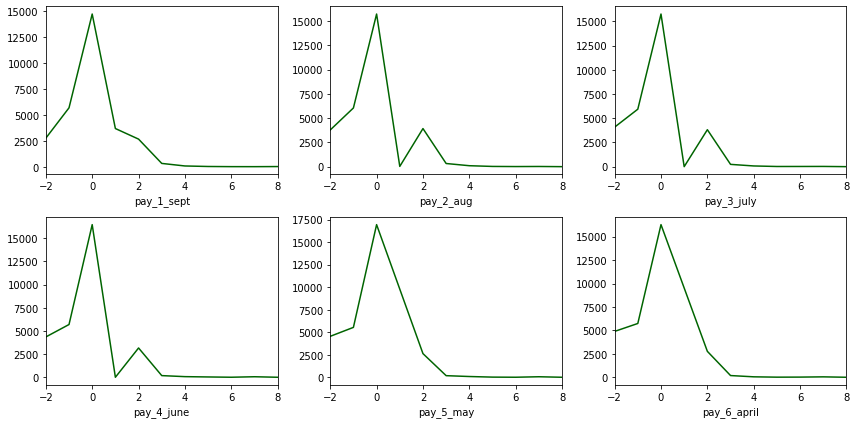

In [29]:
f, axes = plt.subplots(2,3,figsize=[12,6])

df.groupby('pay_1_sept').count()['limit_bal'].plot(ax=axes[0,0], color='darkgreen')
df.groupby('pay_2_aug').count()['limit_bal'].plot(ax=axes[0,1], color='darkgreen')
df.groupby('pay_3_july').count()['limit_bal'].plot(ax=axes[0,2], color='darkgreen')
df.groupby('pay_4_june').count()['limit_bal'].plot(ax=axes[1,0], color='darkgreen')
df.groupby('pay_5_may').count()['limit_bal'].plot(ax=axes[1,1], color='darkgreen')
df.groupby('pay_6_april').count()['limit_bal'].plot(ax=axes[1,2], color='darkgreen')

plt.tight_layout()

Pada 6 buah grafik di atas menunjukkan hubungan status pembayaran terhadap batas saldo. Dari semua grafik menunjukkan status pembayaran 0 memiliki batas saldo yang cukup tinggi.

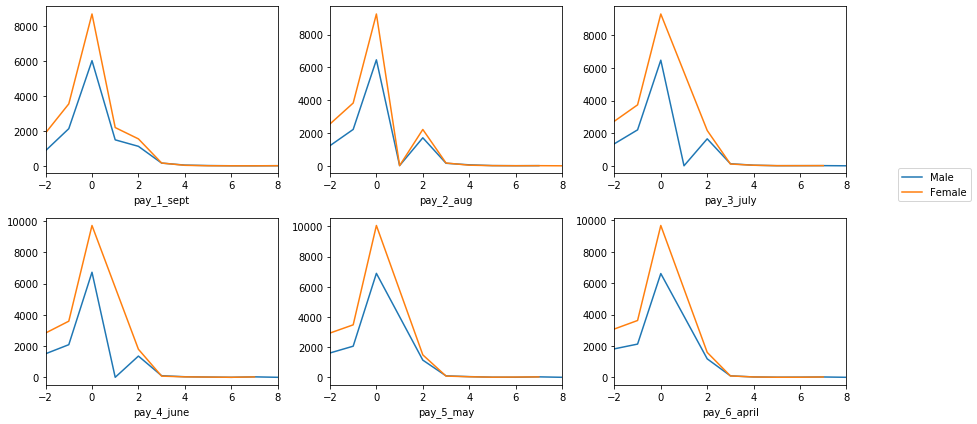

In [30]:
f, axes = plt.subplots(2,3,figsize=[12,6])
df[df['sex']=='male'].groupby('pay_1_sept').count()['limit_bal'].plot(ax=axes[0,0])
df[df['sex']=='female'].groupby('pay_1_sept').count()['limit_bal'].plot(ax=axes[0,0])

df[df['sex']=='male'].groupby('pay_2_aug').count()['limit_bal'].plot(ax=axes[0,1])
df[df['sex']=='female'].groupby('pay_2_aug').count()['limit_bal'].plot(ax=axes[0,1])

df[df['sex']=='male'].groupby('pay_3_july').count()['limit_bal'].plot(ax=axes[0,2])
df[df['sex']=='female'].groupby('pay_3_july').count()['limit_bal'].plot(ax=axes[0,2])

df[df['sex']=='male'].groupby('pay_4_june').count()['limit_bal'].plot(ax=axes[1,0])
df[df['sex']=='female'].groupby('pay_4_june').count()['limit_bal'].plot(ax=axes[1,0])

df[df['sex']=='male'].groupby('pay_5_may').count()['limit_bal'].plot(ax=axes[1,1])
df[df['sex']=='female'].groupby('pay_5_may').count()['limit_bal'].plot(ax=axes[1,1])

df[df['sex']=='male'].groupby('pay_6_april').count()['limit_bal'].plot(ax=axes[1,2])
df[df['sex']=='female'].groupby('pay_6_april').count()['limit_bal'].plot(ax=axes[1,2])
plt.tight_layout()
L=plt.legend(loc='center left', bbox_to_anchor=(1.2,1.2))
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

Pada 6 buah grafik di atas menunjukkan hubungan status pembayaran terhadap batas saldo berdasarkan jenis kelamin. Dari semua grafik menunjukkan status pembayaran 0 memiliki batas saldo yang cukup tinggi dengan jenis kelamin wanita.

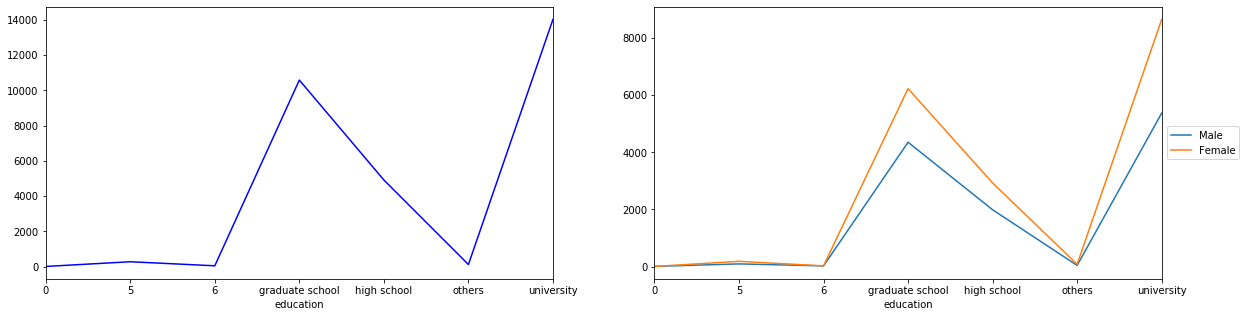

In [31]:
f, axes = plt.subplots(1,2,figsize=[20,5])

df.groupby('education').count()['limit_bal'].plot(ax=axes[0], color='blue')

df[df['sex']=='male'].groupby('education').count()['limit_bal'].plot(ax=axes[1])
df[df['sex']=='female'].groupby('education').count()['limit_bal'].plot(ax=axes[1])

L=plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

<div style="text-align:justify">Grafik di atas menunjukkan jumlah batas saldo kredit yang dimiliki orang-orang berdasarkan jenjang pendidikan. Untuk grafik disebelah kiri berdasarkan jenjang pendidikan terhadap jumlah batas saldo kredit sedangkan pada grafik sebalah kanan berdasarkan jenjang pendidikan terhadap jumlah batas saldo kredit dan jenis kelamin.
</div>

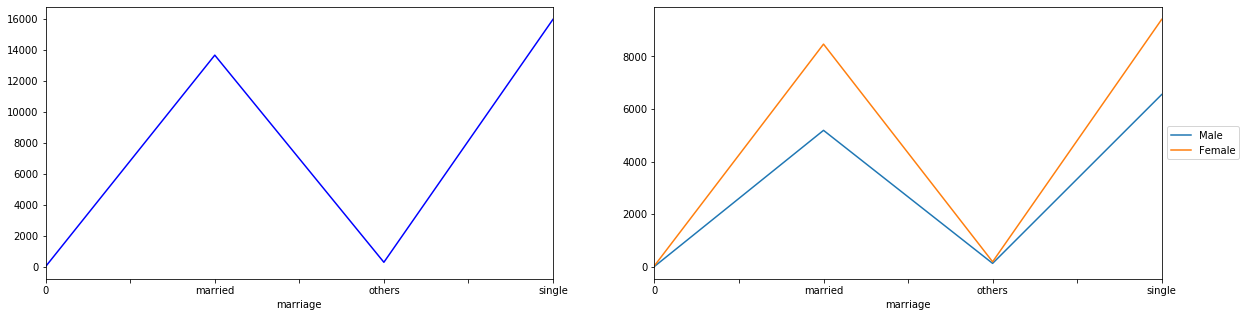

In [32]:
f, axes = plt.subplots(1,2,figsize=[20,5])

df.groupby('marriage').count()['limit_bal'].plot(ax=axes[0], color='blue')

df[df['sex']=='male'].groupby('marriage').count()['limit_bal'].plot(ax=axes[1])
df[df['sex']=='female'].groupby('marriage').count()['limit_bal'].plot(ax=axes[1])

L=plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

<div style="text-align:justify">Grafik di atas menunjukkan jumlah batas saldo kredit yang dimiliki orang-orang berdasarkan status pernikahan. Untuk grafik disebelah kiri berdasarkan status pernikahan terhadap jumlah batas saldo kredit sedangkan pada grafik sebalah kanan berdasarkan status pernikahan terhadap jumlah batas saldo kredit dan jenis kelamin.
</div>

___

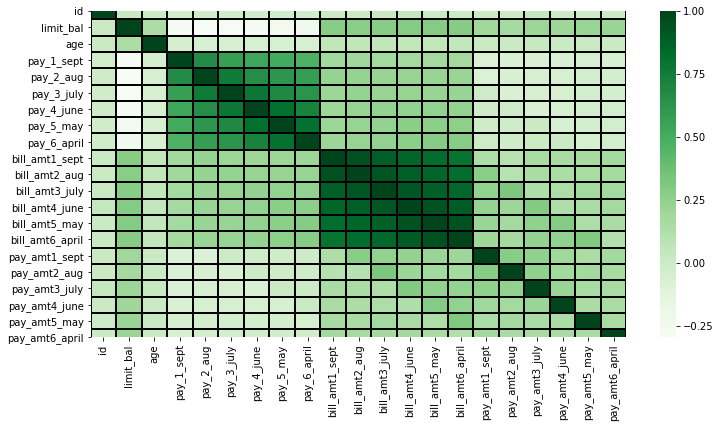

In [33]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), cmap='Greens' , lw=1, linecolor='black')

In [34]:
df_edu = df.pivot_table(values='limit_bal', index='sex', columns='education')
df_marr = df.pivot_table(values='limit_bal', index='sex', columns='marriage')

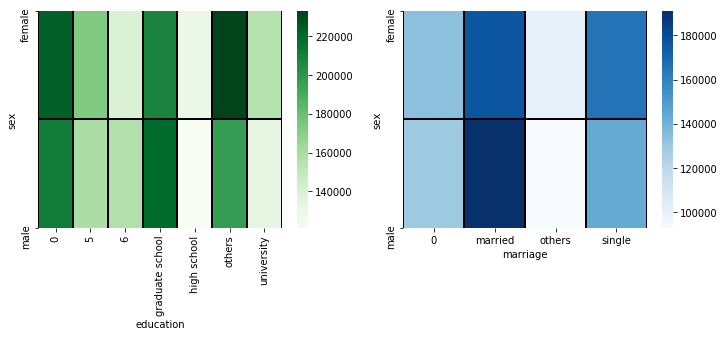

In [35]:
f, axes = plt.subplots(1,2, figsize=[12,4])
sns.heatmap(df_edu, ax=axes[0], cmap='Greens', lw=1, linecolor='black')
sns.heatmap(df_marr, ax=axes[1], cmap='Blues', lw=1, linecolor='black')

<div style="text-align:justify">Grafik heatmap di atas menunjukkan berdasarkan jenjang pendidikan <i>others</i> dengan jenis kelamin wanita diberikan batas saldo kredit dengan jumlah yang cukup besar (grafik heatmap kiri) dan menunjukkan berdasarkan status pernikahan <i>married</i> dengan jenis kelamin pria diberikan batas saldo kredit dengan jumlah yang cukup besar (grafik heatmap kanan).
</div>

___